In [20]:
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline

In [21]:
def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

[[ 0.26239308]
 [-0.03233248]
 [ 0.05102158]
 [-0.00250317]
 [-0.00834988]]
Intercept for OLS:
[0.83382193]
Training MSE for OLS:
0.022013874523121747
Test MSE for OLS:
0.026552138948298543
Beta values for Ridge implementation:
[[ 0.2623911 ]
 [-0.03233241]
 [ 0.05102232]
 [-0.00250318]
 [-0.00834994]]
Intercept for Ridge:
[0.8338219]
Train MSE for Ridge:
0.02201387452372853
Test MSE for Ridge:
0.026552161715194735
Beta values for Ridge implementation:
[[ 0.26237322]
 [-0.03233175]
 [ 0.05102895]
 [-0.00250326]
 [-0.00835049]]
Intercept for Ridge:
[0.83382156]
Train MSE for Ridge:
0.022013874583790383
Test MSE for Ridge:
0.02655236668103087
Beta values for Ridge implementation:
[[ 0.26219463]
 [-0.03232522]
 [ 0.05109518]
 [-0.00250407]
 [-0.008356  ]]
Intercept for Ridge:
[0.83381822]
Train MSE for Ridge:
0.022013880579881608
Test MSE for Ridge:
0.026554422639951496
Beta values for Ridge implementation:
[[ 0.26042505]
 [-0.03226017]
 [ 0.05175115]
 [-0.00251215]
 [-0.00841051]]
Interc

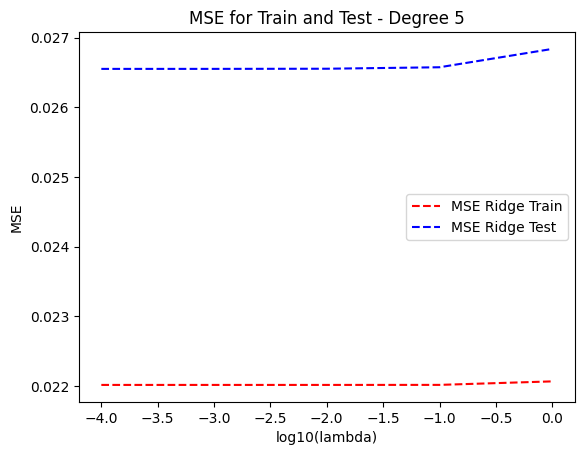

In [22]:
np.random.seed(2018)

n = 100
degree = 6

# Make data set
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)

X = np.zeros((n, degree-1))
for d in range(1, degree): # No intercept column
    X[:, d-1] = (x**(d)).flatten()

# Split data set in training and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# SCALING DATA
X_train_mean = np.mean(X_train, axis = 0)
# Center by removing the mean
X_train_scaled = X_train - X_train_mean 
X_test_scaled = X_test - X_train_mean
# Remove the intercept from the training data.
y_scaler = np.mean(y_train)           
y_train_scaled = y_train - y_scaler

# OLS
OLSbeta = np.linalg.inv(X_train_scaled.T @ X_train_scaled) @ X_train_scaled.T @ y_train_scaled
print(OLSbeta)
intercept = y_scaler - X_train_mean @ OLSbeta
print("Intercept for OLS:")
print(intercept)

ytildeOLS = X_train @ OLSbeta + intercept
print("Training MSE for OLS:")
print(MSE(y_train,ytildeOLS))

ypredictOLS = X_test @ OLSbeta + intercept
print("Test MSE for OLS:")
print(MSE(y_test,ypredictOLS))

# RIDGE REGRESSION
p = degree-1
I = np.eye(p,p)
lambdas = [0.0001, 0.001, 0.01, 0.1, 1.0] #10.0, 100.0, 1000.0, 10000.0, 100000.0, 1000000.0]
MSEtraining = np.zeros(len(lambdas))
MSEtest = np.zeros(len(lambdas))
for i in range(len(lambdas)):
    lmb = lambdas[i]
    Ridgebeta = np.linalg.inv(X_train_scaled.T @ X_train_scaled+lmb*I) @ X_train_scaled.T @ y_train_scaled
    intercept_ = y_scaler - X_train_mean @ Ridgebeta # The intercept can be shifted so the model can predict on uncentered data
    # Prediction
    ytildeRidge = X_train_scaled @ Ridgebeta + y_scaler
    ypredictRidge = X_test_scaled @ Ridgebeta + y_scaler
    MSEtraining[i] = MSE(y_train, ytildeRidge)
    MSEtest[i] = MSE(y_test, ypredictRidge)
    print("Beta values for Ridge implementation:")
    print(Ridgebeta)
    print('Intercept for Ridge:')
    print(intercept_)
    print("Train MSE for Ridge:")
    print(MSEtraining[i])
    print("Test MSE for Ridge:")
    print(MSEtest[i])

# Now plot the results
plt.figure()
plt.plot(np.log10(lambdas), MSEtraining, 'r--', label = 'MSE Ridge Train')
plt.plot(np.log10(lambdas), MSEtest, 'b--', label = 'MSE Ridge Test')
plt.xlabel('log10(lambda)')
plt.ylabel("MSE")
plt.title('MSE for Train and Test - Degree 5')
plt.legend()
plt.show()

Degree = 10

[[ 9.50766662e-02]
 [-6.34940169e-01]
 [ 2.32749959e-01]
 [ 3.31687126e-01]
 [-5.36031195e-02]
 [-6.49920783e-02]
 [ 3.39199949e-03]
 [ 5.05661046e-03]
 [-3.40337586e-05]
 [-1.29465818e-04]]
Intercept for OLS:
[0.99406809]
Training MSE for OLS:
0.006771665993194645
Test MSE for OLS:
0.011386355322723479
Beta values for Ridge implementation:
[[ 9.50815704e-02]
 [-6.34855454e-01]
 [ 2.32739915e-01]
 [ 3.31618888e-01]
 [-5.35987817e-02]
 [-6.49720868e-02]
 [ 3.39133746e-03]
 [ 5.05416640e-03]
 [-3.40005876e-05]
 [-1.29359909e-04]]
Intercept for Ridge:
[0.99405083]
Train MSE for Ridge:
0.006771666092979511
Test MSE for Ridge:
0.01138614962437418
Beta values for Ridge implementation:
[[ 9.51256706e-02]
 [-6.34094214e-01]
 [ 2.32649590e-01]
 [ 3.31005717e-01]
 [-5.35597766e-02]
 [-6.47924488e-02]
 [ 3.38538449e-03]
 [ 5.03220485e-03]
 [-3.37023117e-05]
 [-1.28408249e-04]]
Intercept for Ridge:
[0.99389575]
Train MSE for Ridge:
0.006771675943893597
Test MSE for Ridge:
0.011384311070198239
Beta

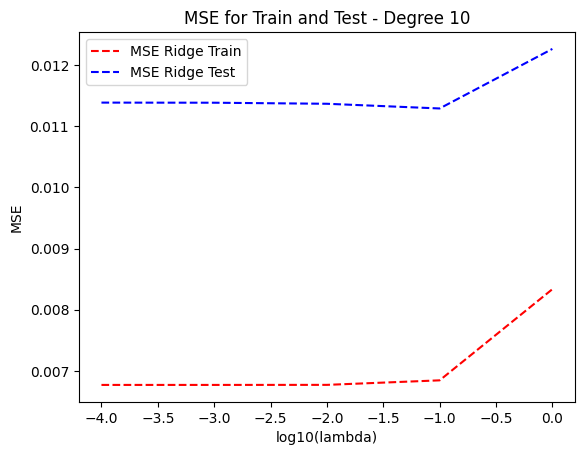

In [23]:
np.random.seed(2018)

n = 100
degree = 11

# Make data set
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)

X = np.zeros((n, degree-1))
for d in range(1, degree): #No intercept column
    X[:, d-1] = (x**(d)).flatten()

# Split data set in training and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# SCALING DATA
X_train_mean = np.mean(X_train, axis = 0)
# Center by removing the mean
X_train_scaled = X_train - X_train_mean 
X_test_scaled = X_test - X_train_mean
# Remove the intercept from the training data.
y_scaler = np.mean(y_train)           
y_train_scaled = y_train - y_scaler

# OLS
OLSbeta = np.linalg.inv(X_train_scaled.T @ X_train_scaled) @ X_train_scaled.T @ y_train_scaled
print(OLSbeta)
intercept = y_scaler - X_train_mean @ OLSbeta
print("Intercept for OLS:")
print(intercept)

ytildeOLS = X_train @ OLSbeta + intercept
print("Training MSE for OLS:")
print(MSE(y_train,ytildeOLS))

ypredictOLS = X_test @ OLSbeta + intercept
print("Test MSE for OLS:")
print(MSE(y_test,ypredictOLS))

# RIDGE REGRESSION
p = degree-1
I = np.eye(p,p)
lambdas = [0.0001, 0.001, 0.01, 0.1, 1.0]
MSEtraining = np.zeros(len(lambdas))
MSEtest = np.zeros(len(lambdas))
for i in range(len(lambdas)):
    lmb = lambdas[i]
    Ridgebeta = np.linalg.inv(X_train_scaled.T @ X_train_scaled+lmb*I) @ X_train_scaled.T @ y_train_scaled
    intercept_ = y_scaler - X_train_mean @ Ridgebeta # The intercept can be shifted so the model can predict on uncentered data
    # Prediction
    ytildeRidge = X_train_scaled @ Ridgebeta + y_scaler
    ypredictRidge = X_test_scaled @ Ridgebeta + y_scaler
    MSEtraining[i] = MSE(y_train, ytildeRidge)
    MSEtest[i] = MSE(y_test, ypredictRidge)
    print("Beta values for Ridge implementation:")
    print(Ridgebeta)
    print('Intercept for Ridge:')
    print(intercept_)
    print("Train MSE for Ridge:")
    print(MSEtraining[i])
    print("Test MSE for Ridge:")
    print(MSEtest[i])

# Now plot the results
plt.figure()
plt.plot(np.log10(lambdas), MSEtraining, 'r--', label = 'MSE Ridge Train')
plt.plot(np.log10(lambdas), MSEtest, 'b--', label = 'MSE Ridge Test')
plt.xlabel('log10(lambda)')
plt.ylabel("MSE")
plt.title('MSE for Train and Test - Degree 10')
plt.legend()
plt.show()

Degree = 15

[[ 2.00135944e-02]
 [-4.57510387e-01]
 [ 4.77633350e-01]
 [ 1.42925979e-02]
 [-2.76805592e-01]
 [ 1.39579678e-01]
 [ 9.36097411e-02]
 [-5.70055651e-02]
 [-1.89792142e-02]
 [ 9.51948171e-03]
 [ 2.15814486e-03]
 [-7.45116277e-04]
 [-1.26816466e-04]
 [ 2.26657809e-05]
 [ 3.01957172e-06]]
Intercept for OLS:
[0.97768102]
Training MSE for OLS:
0.006513421428789294
Test MSE OLS:
0.013029434410907939
Beta values for Ridge implementation
[[ 2.02962597e-02]
 [-4.57390654e-01]
 [ 4.76560388e-01]
 [ 1.41374664e-02]
 [-2.75607579e-01]
 [ 1.39666027e-01]
 [ 9.30091641e-02]
 [-5.70302692e-02]
 [-1.88225817e-02]
 [ 9.52326385e-03]
 [ 2.13605327e-03]
 [-7.45410171e-04]
 [-1.25218234e-04]
 [ 2.26748753e-05]
 [ 2.97307380e-06]]
Intercept for Ridge:
[0.97766425]
Train MSE for Ridge:
0.006513422601351749
Test MSE for Ridge:
0.01302706365794019
Beta values for Ridge implementation
[[ 2.27559193e-02]
 [-4.56326208e-01]
 [ 4.67220692e-01]
 [ 1.27591919e-02]
 [-2.65182291e-01]
 [ 1.40432041e-01]
 [ 8.77840455e

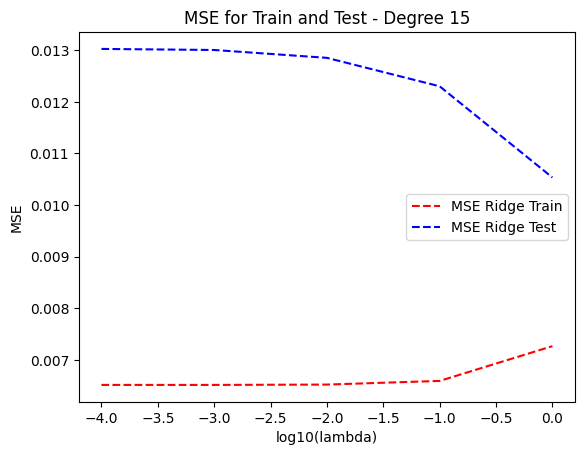

In [24]:
np.random.seed(2018)

n = 100
degree = 16

# Make data set
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)

X = np.zeros((n, degree-1))
for d in range(1, degree): #No intercept column
    X[:, d-1] = (x**(d)).flatten()

# Split data set in training and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# SCALING DATA
X_train_mean = np.mean(X_train, axis = 0)
# Center by removing the mean
X_train_scaled = X_train - X_train_mean 
X_test_scaled = X_test - X_train_mean
# Remove the intercept from the training data.
y_scaler = np.mean(y_train)           
y_train_scaled = y_train - y_scaler

# OLS
OLSbeta = np.linalg.inv(X_train_scaled.T @ X_train_scaled) @ X_train_scaled.T @ y_train_scaled
print(OLSbeta)
intercept = y_scaler - X_train_mean @ OLSbeta
print("Intercept for OLS:")
print(intercept)

ytildeOLS = X_train @ OLSbeta + intercept
print("Training MSE for OLS:")
print(MSE(y_train,ytildeOLS))

ypredictOLS = X_test @ OLSbeta + intercept
print("Test MSE OLS:")
print(MSE(y_test,ypredictOLS))

# RIDGE REGRESSION
p = degree-1
I = np.eye(p,p)
lambdas = [0.0001, 0.001, 0.01, 0.1, 1.0]
MSEtraining = np.zeros(len(lambdas))
MSEtest = np.zeros(len(lambdas))
for i in range(len(lambdas)):
    lmb = lambdas[i]
    Ridgebeta = np.linalg.inv(X_train_scaled.T @ X_train_scaled+lmb*I) @ X_train_scaled.T @ y_train_scaled
    intercept_ = y_scaler - X_train_mean @ Ridgebeta # The intercept can be shifted so the model can predict on uncentered data
    # Prediction
    ytildeRidge = X_train_scaled @ Ridgebeta + y_scaler
    ypredictRidge = X_test_scaled @ Ridgebeta + y_scaler
    MSEtraining[i] = MSE(y_train, ytildeRidge)
    MSEtest[i] = MSE(y_test, ypredictRidge)
    print("Beta values for Ridge implementation")
    print(Ridgebeta)
    print('Intercept for Ridge:')
    print(intercept_)
    print("Train MSE for Ridge:")
    print(MSEtraining[i])
    print("Test MSE for Ridge:")
    print(MSEtest[i])

# Now plot the results
plt.figure()
plt.plot(np.log10(lambdas), MSEtraining, 'r--', label = 'MSE Ridge Train')
plt.plot(np.log10(lambdas), MSEtest, 'b--', label = 'MSE Ridge Test')
plt.xlabel('log10(lambda)')
plt.ylabel("MSE")
plt.title('MSE for Train and Test - Degree 15')
plt.legend()
plt.show()

The MSE for train is always lower than the MSE for test (and it makes sense, since we are training our model on the train set, so it should be better working on the train set than on the test set). 

For degree 5, the results of OLS and Ridge (with the lowest values of lambda) are very similar: the MSE is almost the same, for both train and test data. For higher values of lambda, the MSE of Ridge regression starts increasing: it is not shown in the graph (because the exercise required to work with specific values of lambda), but if we change and increase the value of lambda, we can see that le curve of the MSE (for both train and test data) starts increasing very fast.

For degree 10, almost the same thing happens (as in degree 5). The only difference is that the error values are lower than the previous case and also the train error increase more than the previous case, where it was more or less constant.

For the model with degree 15, the results of OLS and Ridge (with the lowest values of lambda) are very similar with respect to the previous case. However, for higher values of lambda, the MSE of Ridge regression starts to change: the train MSE increases, while the test MSE decreases. It could be strange that the test error decreses, but this drop doesn't last long: if we compute the same thing with higher vales of lambda, then we can see that the test error starts to increase again after a little bit. 